Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pickle

Load the data

In [7]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

Data Pre processing

In [8]:

label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df = pd.get_dummies(df, drop_first=True)


Split the data

In [9]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Feature Scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Building

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

 Model Evaluation


In [12]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[378   2]
 [ 56   5]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.71      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.79      0.54      0.54       441
weighted avg       0.85      0.87      0.82       441

ROC-AUC Score: 0.7700388265746332


Finding Feature Importance

In [13]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importance.head(10))

MonthlyIncome         0.081294
Age                   0.057200
OverTime_Yes          0.051431
TotalWorkingYears     0.050934
DailyRate             0.046271
HourlyRate            0.044220
MonthlyRate           0.043141
EmployeeNumber        0.041561
NumCompaniesWorked    0.039120
YearsAtCompany        0.038845
dtype: float64


Plotting the feature importance

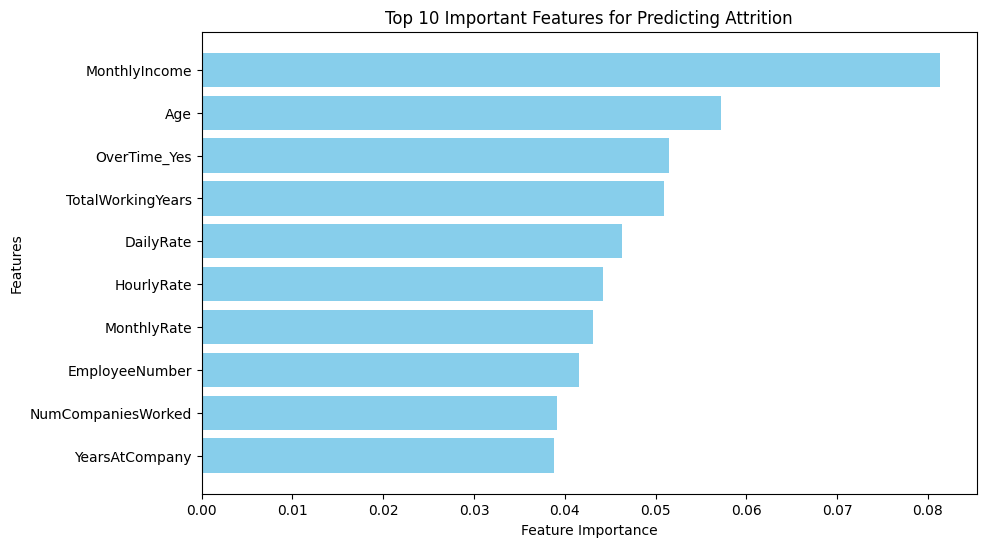

In [14]:
top_features = feature_importance.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features.values, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features for Predicting Attrition')
plt.gca().invert_yaxis()
plt.show()

In [15]:
import joblib

model_filename = 'attrition_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to attrition_model.pkl


In [16]:
loaded_model = joblib.load(model_filename)

y_pred_loaded = loaded_model.predict(X_test)
print(classification_report(y_test, y_pred_loaded))


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.71      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.79      0.54      0.54       441
weighted avg       0.85      0.87      0.82       441

